# **SETUP**

In [1]:
# Load dotenv
import os, pathlib
from dotenv import load_dotenv, set_key
load_dotenv()

# Store project root in .env
PROJECT_ROOT = pathlib.Path().resolve()
ENV_PATH = PROJECT_ROOT / ".env"
if not ENV_PATH.exists():
    raise FileNotFoundError(f".env file not found.")
    
if "PROJECT_ROOT" not in os.environ:
    set_key(str(ENV_PATH), "PROJECT_ROOT", str(PROJECT_ROOT))
else:
    PROJECT_ROOT = pathlib.Path(os.environ["PROJECT_ROOT"])

# Get API Key
OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")
if not OPENAI_API_KEY:
    print("OpenAI API Key not found")

In [2]:
# Import libraries
import pandas as pd
import numpy as np

# Import route_query function
import import_ipynb
from route_query import route_query

# **USER ACTIONS**
<hr>

- user_load_dataset(): prompts user to pick csv to load into dataframe
- user_actions(): prompts user to perform actions on dataframe

In [3]:
def user_load_dataset():
    # Check dataset folder
    datasets_path = "datasets"
    if not os.path.exists(datasets_path):
        print(f"'{datasets_path}' folder not found.")
        return
    
    print("LOAD YOUR DATASET TO GET STARTED!")
    # List existing CSVs in dataset folder
    file_paths = [f for f in os.listdir(datasets_path) if f.lower().endswith('.csv')]
    if file_paths:
        print(f"CSV files in '{datasets_path}':")
        for i, fname in enumerate(file_paths):
            print(f"{i+1}. {fname}")
    else:
        print("No CSV files found in 'datasets' folder.")
        return

    print("\nNot seeing your data? Make sure your CSV file is in 'datasets' folder")
    print("Type x to exit.")
    user_file = input("To load your dataset, input either the number or name of your desired CSV: ")

    if user_file.lower() == "x":
        print("Exiting.")
        return
    
    # Try to load by number
    if user_file.isnumeric():
        idx = int(user_file) - 1
        if 0 <= idx < len(file_paths):
            selected_file = file_paths[idx]
        else:
            print("Invalid number.")
            return
    # Not numeric try to load by name
    else:
        if user_file in file_paths:
            selected_file = user_file
        else:
            print("File not found.")
            return

    df = pd.read_csv(os.path.join(datasets_path, selected_file))
    print(f"\nLoaded '{selected_file}' with shape {df.shape}")
    print(df.head(5))
    return df

In [4]:
def user_actions(df):
    out_path = "datasets_out"
    while True:
        print("\nCommands:")
        print("1. View dataframe (head)")
        print("2. Output dataframe to CSV")
        print("x. Exit")
        user_query = input("\nEnter a command number or a data cleaning/query command: ")
        if user_query.lower() == "x":
            print("Exiting.")
            return df
        elif user_query == "1":
            print(df.head())
            _ = input("enter anything to continue")
        elif user_query == "2":
            if not os.path.exists(out_path):
                os.makedirs(out_path)
            out_file = os.path.join(out_path, "output.csv")
            df.to_csv(out_file, index=False)
            print(f"Dataframe saved to {out_file}")
            _ = input("enter anything to continue")
        else:
            # Calls route_query
            df = route_query(user_query, df)

**MAIN FUNCTION**
-

In [5]:
def main():
    df = user_load_dataset()
    while df is None:
        df = user_load_dataset()
    df = user_actions(df)
    print("========== FINAL DF ==========")
    print(df)

**Testing**

LOAD YOUR DATASET TO GET STARTED!
CSV files in 'datasets':
1. Life Expectancy Data.csv
2. household_vista_2023_2024.csv
3. smoke.csv

Not seeing your data? Make sure your CSV file is in 'datasets' folder
Type x to exit.

Loaded 'Life Expectancy Data.csv' with shape (2938, 22)
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243    

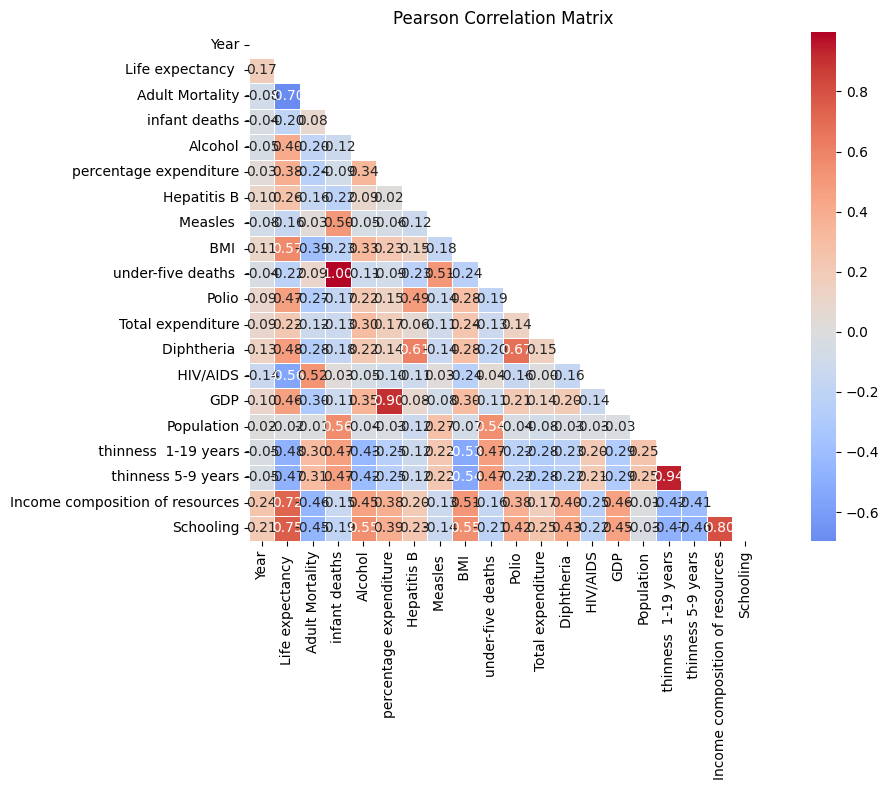

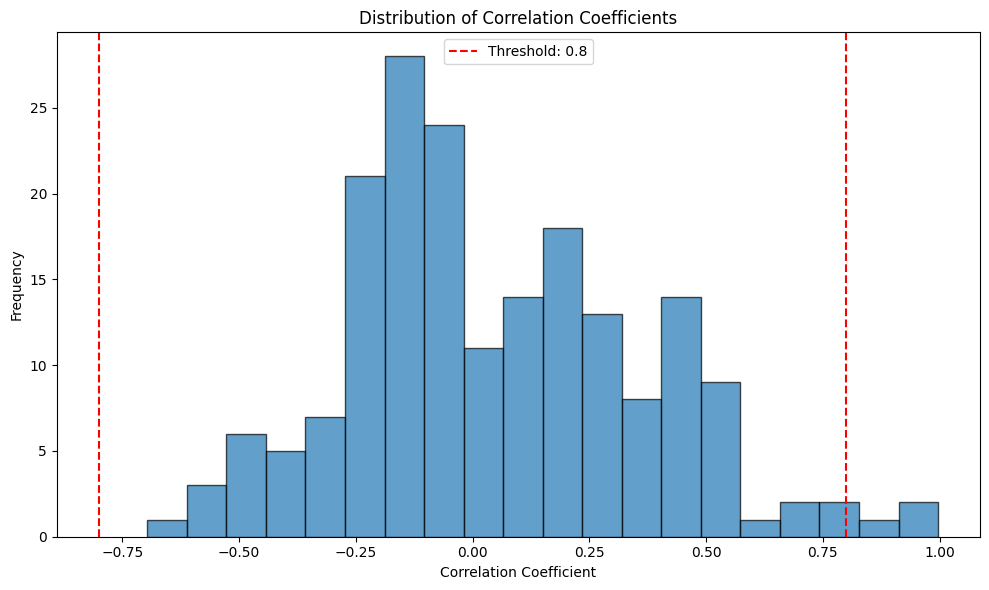

Correlation analysis has been performed on the dataset. The results are stored in the variable 'corr_analysis'.

Commands:
1. View dataframe (head)
2. Output dataframe to CSV
x. Exit
df = profiling(df, "detect patterns in the data")
=== PATTERN DETECTION ANALYSIS ===
Analyzing 22 columns for patterns...
\nPATTERN ANALYSIS SUMMARY:
  Text columns: 2
  Numeric columns: 20
  Categorical columns: 0
  Columns with missing data: 14
  Total patterns detected: 18
\nTEXT PATTERNS DETECTED:
  Status: ID-like format (length=10, 2938/2938 alphanumeric)
\nNUMERIC PATTERNS DETECTED:
  Year: Year-like values (1900-2030 range)
  Life expectancy : Percentage-like values (0-100 range)
  Adult Mortality: Integer values in float column
  Alcohol: Percentage-like values (0-100 range)
  Hepatitis B: Integer values in float column, Percentage-like values (0-100 range)
   BMI : Percentage-like values (0-100 range)
  Polio: Integer values in float column, Percentage-like values (0-100 range)
  Total expenditur

In [6]:
main()